In [1]:
import torch
# import cv2
import math
# import Exception
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_dir = "/home/as14229/Shared/SuperGAN/data/gfpgan_test/"
image_dict = torch.load(data_dir+"gfpgan_image_stages.pth", map_location=torch.device('cpu'))

In [3]:
# image = unnormalize(image_dict['r1'])
# image =image_dict['output']
# image *=0.5
# image +=0.5
# plt.imshow(image.permute(1, 2, 0))

# image =image_dict['input']
# image = np.multiply(image, 0.5)
# image = image + 0.5
# plt.imshow(image)

image = image_dict["input"]
image.shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


input 'numpy.ndarray' object has no attribute 'detach'


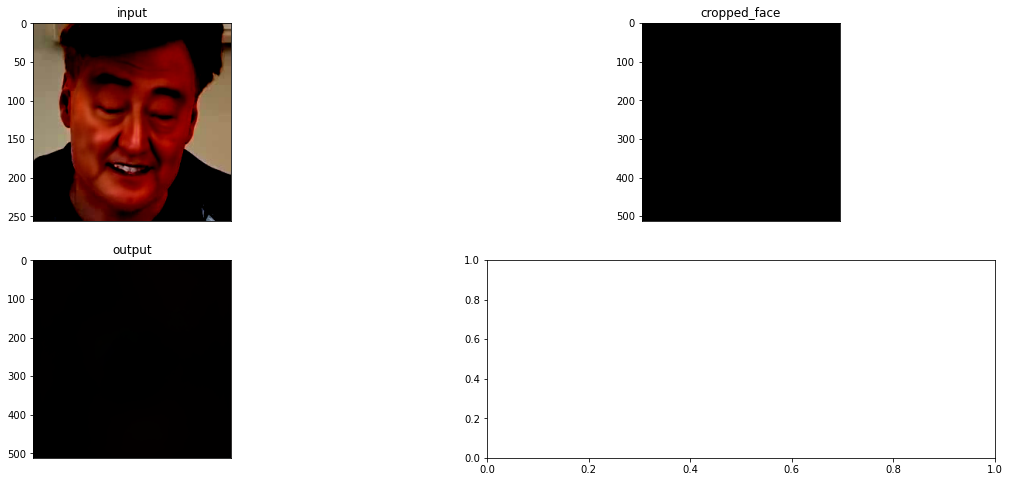

In [3]:
imlen = len(image_dict.keys())

fig, ax = plt.subplots(2,math.ceil(imlen/2), figsize=(20, 8))
ax = ax.ravel()

for i, (stage,image) in enumerate(image_dict.items()):
    ax[i].set_title(stage)
    ax[i].set_xticks([])
    try:
        image_tensor = image.detach().clone()

        try:
            image_tensor *= 0.5
            image_tensor += 0.5
        except Exception as e:
            print(stage,e)
            
        ax[i].imshow(image_tensor.permute(1, 2, 0));
    except Exception as e:
        print(stage, e)
        ax[i].imshow(image)
    
plt.show()